In [2]:
import os
os.environ

environ{'LANG': 'zh_TW.UTF-8',
        'XPC_FLAGS': '0x0',
        'DISPLAY': '/private/tmp/com.apple.launchd.vnkuTa2rys/org.macosforge.xquartz:0',
        'OLDPWD': '/Users/kent',
        'TERM_SESSION_ID': '888FB46E-844B-4F84-8FAD-AE5528C6FDD9',
        '__CF_USER_TEXT_ENCODING': '0x1F5:0x2:0x35',
        'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.UDa9YMBd1l/Listeners',
        'USER': 'kent',
        'PWD': '/Users/kent/git',
        'HOME': '/Users/kent',
        'TERM_PROGRAM': 'Apple_Terminal',
        'TERM_PROGRAM_VERSION': '388.1.3',
        'Apple_PubSub_Socket_Render': '/private/tmp/com.apple.launchd.QODUtCYtXH/Render',
        'TMPDIR': '/var/folders/3c/yndm605s4890ldjxk7f94th00000gn/T/',
        'XPC_SERVICE_NAME': '0',
        'SHELL': '/bin/zsh',
        'TERM': 'xterm-color',
        'SHLVL': '2',
        'LOGNAME': 'kent',
        'PATH': '/Users/kent/Downloads/google-cloud-sdk/bin:/Library/Frameworks/Python.framework/Versions/3.7/bin:/Library/Frameworks/Python.f

In [7]:
# google account 
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/Users/kent/gt-key.json'
# 

In [9]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# import  plot_confusion_matrix

In [10]:
from google.cloud import bigquery
client = bigquery.Client()

query = (
    """
    SELECT
  pvid,max(e_value) as stay_time
FROM
  `pixnet-gt.grouptargeting.event_track_log_1st_20191111`
  
        where e_category = 'article_stay_time'

group by pvid
    
    """
)
query_job = client.query(
    query,
    # Location must match that of the dataset(s) referenced in the query.
    location="US",
)  # API request - starts the query



In [37]:
df['stay_time'] = df['stay_time'] /1000

In [42]:
data = df['stay_time'][(df['stay_time'] < 3600)][(df['stay_time'] >0)]

# Show Histgram

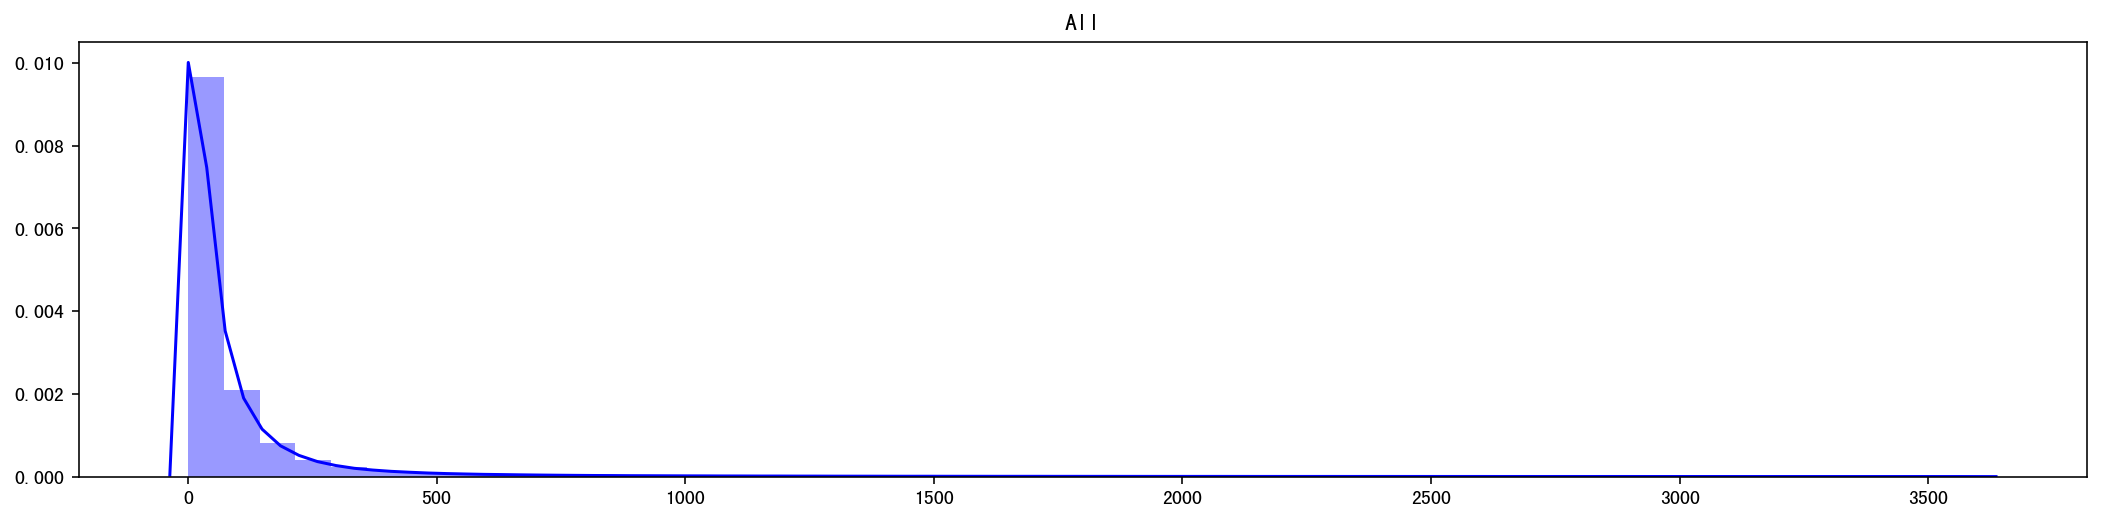

In [43]:
# conam
fig, ax = plt.subplots(1, 1, figsize=(18,4))
ax.set_title("All")
sns.distplot(data.values, ax=ax, color='b',norm_hist=True,)




# 比較一下 mean vs median vs geometric mean

* mean 容易被一些極端所影響


In [45]:
data.mean()

99.5483564442886

In [46]:
data.median()

34.595

In [49]:
from scipy import stats
 
stats.gmean(data)

30.122528161820338